In [15]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
from tqdm import tqdm

# Punto 1

In [101]:
Min, Max, N = 0., 40., 51
x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]

In [84]:
# Se definen las fronteras del sistema 
def h1(y):
    return 100.
def h2(y):
    return 0.
def h3(x):
    return 0.
def h4(x):
    return 0.

In [85]:
#Se implementan las fronteras del sistema
    
def InitT():
    
    T = np.zeros( (N,N) )
    
    T[0,:]  = h1(y)
    T[-1,:] = h2(y)
    T[:,0]  = h3(x)
    T[:,-1] = h4(x)
    
    return T

# # Se inicializa el el sistema
# T = InitT()

In [86]:
#Revisar las notas debido a que en ellas es donde se explica que omega es
#el parametro de sobre relajación el cual permite que se tenga un metodo con mejor convergencia

def GetRelaxation(T, omega, Nit = int(1e5), tolerancia = 1e-2):
     # Omega debe setar entre 1 y 1.999...

    itmax = 0
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1])
                r = omega*(tmp - T[i,j])
                
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
                    
       # print(T)
       # print(it)
        
        if np.abs(dmax) < tolerancia:
            #print(it)
            itmax = it
            break
            
    return T,itmax

In [109]:
W = np.linspace(1,1.9, 10)
def GetData(W_):
    ite = np.array([])
    
    for i in range(len(W_)):
        T = InitT()
        Tn,it =  GetRelaxation(T,W_[i])
        ite = np.append(ite, it)
   
    return ite

Iteraciones = GetData(W)
pos = np.min(Iteraciones)
print(f'El parametro que optimiza el metodo es w = {round(1.9, 4)} y se realizan {pos} iteraciones.')


  0%|          | 52/100000 [00:00<18:00, 92.52it/s]

El parametro que optimiza el metodo es w = 1.9 y se realizan 52.0 iteraciones.


<IPython.core.display.Javascript object>


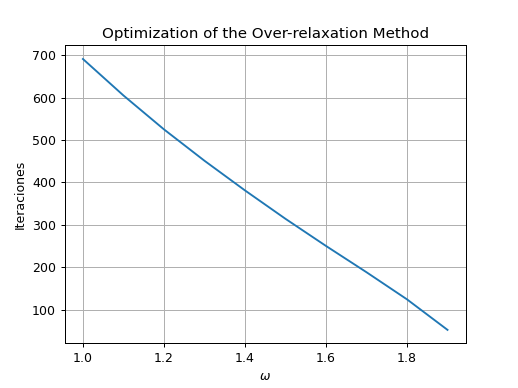

In [114]:
plt.plot(W, Iteraciones)
plt.title('Optimization of the Over-relaxation Method')
plt.grid()
plt.xlabel(r'$\omega$')
plt.ylabel('Iteraciones')
plt.show()

In [110]:
# Note que si omega es mayor a 2 el metodo diverge
# Mire lo que ocurre para valores cercanos a 2; de esta forma se puede generalizar para omega mayores a 2
w = np.linspace(1.9, 1.999, 3)
pw = GetData(w)

  3%|▎         | 3370/100000 [00:37<17:44, 90.74it/s] 

De esta manera se puede ver que el metodo, para omegas cercanos a 2 comienza a emplear un gran número de iteraciones.
Si se llega a omega = 2 entonces el metodo no convergerá.


<IPython.core.display.Javascript object>


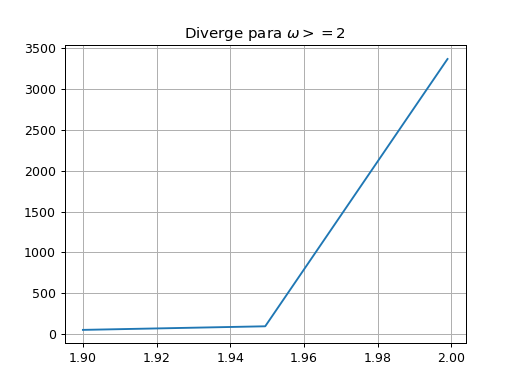

De esta manera se puede ver que el metodo, para omegas cercanos a 2 comienza a emplear un gran número de iteraciones.
Si se llega a omega = 2 entonces el metodo no convergerá.


In [118]:
plt.title('Diverge para'+' '+ r'$\omega >= 2$')
plt.grid()
plt.plot(w, pw)
print('De esta manera se puede ver que el metodo, para omegas cercanos a 2 comienza a emplear un gran número de iteraciones.')
print('Si se llega a omega = 2 entonces el metodo no convergerá.')

  0%|          | 0/100000 [00:00<?, ?it/s]


<IPython.core.display.Javascript object>


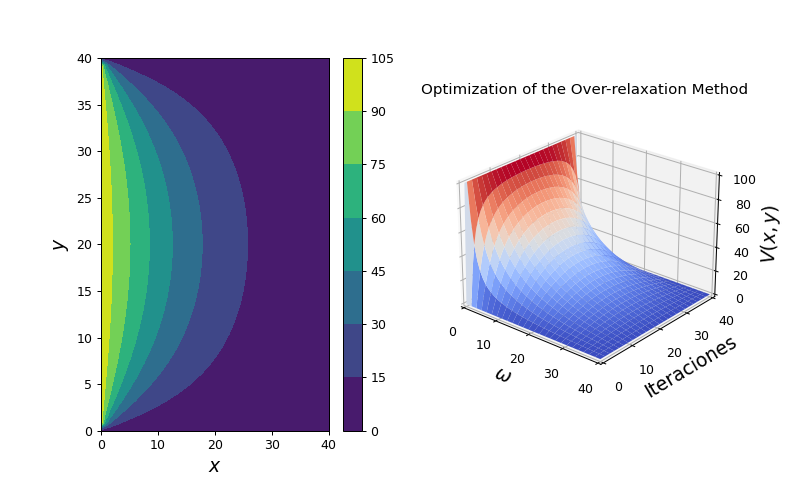

In [102]:
Tf1, _ =  GetRelaxation(T, 1.9)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2, projection = '3d', elev = 25, azim = -50)

X,Y = np.meshgrid(x,y)
c = ax.contourf(X,Y,Tf1.T)
ax.set_xlabel(r'$x$', fontsize=15)
ax.set_ylabel(r'$y$', fontsize=15)
fig.colorbar(c, ax = ax)

ax1.set_xlim3d(0, 40)
ax1.set_ylim3d(0, 40)

ax1.set_xlabel(r'$x$', fontsize=15)
ax1.set_ylabel(r'$y$', fontsize=15)
ax1.set_zlabel(r'$V(x,y)$', fontsize=15)

ax1.plot_surface(X, Y, Tf1.T, cmap=cm.coolwarm)
plt.show()

# Punto 2

In [136]:
Min, Max, N = 0.,1.,100
x = np.linspace(Min,Max,N)
y = x.copy()
h  = 0.02
V0 = 1
nu = 0.2


In [134]:
# Ecuación de Navier stoke
U = np.zeros((51, 51))
for i in range(1, len(U)-1):
    U[i][-1] = V0
W = np.zeros((51, 51))

In [139]:
def GetRelaxation2(T1, T2, omega = 0.9, Nit = int(1e5), tolerancia = 1e-2):
     # Omega debe setar entre 0 y 1...
    R = V0*h/nu
    itmax = 0
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(U)-1):
            for j in range(1, len(W)-1):
                tmp_u =  0.25*(U[i+1,j]+ U[i-1,j]+U[i,j+1]+U[i,j-1]+((W[i,j])*(h**2)))
                tmp_w = (0.25*(W[i+1,j]+ W[i-1,j]+W[i,j+1]+W[i,j-1])) - ((R/16)*(U[i,j+1] - U[i,j-1])*(W[i+1, j]+ W[i-1, j])) \
                        + ((R/16)*(W[i,j+1] - W[i,j-1])*(U[i+1, j]+ U[i-1, j]))
                
                r_u = omega*(tmp_u - T1[i,j])
                r_w = omega*(tmp_w - T2[i,j])
                
                T1[i,j] += r_u
                T2[i,j] += r_w
                
                if np.abs(r_u) > dmax:
                    dmax = r_u
       # print(T)
       # print(it)
        
        if np.abs(dmax) < tolerancia:
            print(it)
            itmax = it
            break
            
    return T1, T2, itmax

In [145]:
T1,T2, _ = GetRelaxation2(U, W, omega = 0.9, Nit = int(1e5), tolerancia = 1e-2)

  0%|          | 0/100000 [00:00<?, ?it/s]

0


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Punto 3

In [141]:
# Se definen las fronteras del sistema 
def derecha():
    A = -2*((T1[i][j+1]-T1[i][j])/h**2)
    return A

def izquierda():
    A = -2*((T1[i][j-1]-T1[i][j])/h**2)
    return A

# Punto 4

<IPython.core.display.Javascript object>


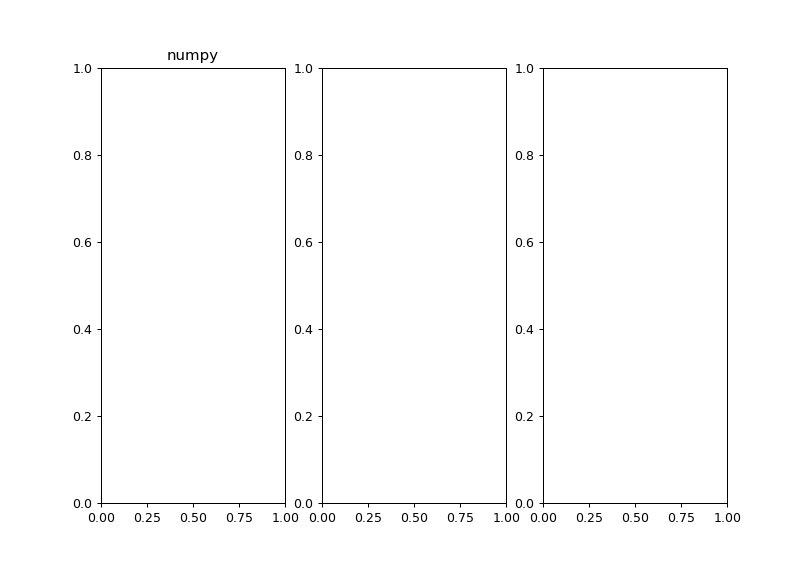

ValueError: 'u' and 'v' must match the shape of 'Grid(x, y)'

In [144]:
fig2 = plt.figure(figsize=(10,7))
ax = fig2.add_subplot(1,3,1)
ax1 = fig2.add_subplot(1,3,2)
ax2 = fig2.add_subplot(1,3,3)
ax.set_title('numpy')
ax.streamplot(x, y, T1,T2,color='b',density=2)
ax1.set_title('Metodos2')
ax1.streamplot(x,y,u1,v1,color='r',density=2)
ax2.set_title('Convolución')
ax2.streamplot(x,y,u2,v2,color='k',density=2)